In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import math
from scipy import stats


In [107]:
#Reading the merged csv file 
md=pd.read_csv('full_data.csv',parse_dates = ['date'])

In [108]:
#Information and pre-processing the data
md.info()
md['AQI(25)']=md['pm25']*4
md['AQI(10)']=md['pm10']*2
md=md.drop(['time_maxgust','9am_temp','9am_rh','9am_wd','9am_ws','9am_mslp','3pm_temp','3pm_rh','3pm_wd','3pm_ws','3pm_mslp','pm25','pm10','Unnamed: 0'],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2581 non-null   int64         
 1   date          2581 non-null   datetime64[ns]
 2   mintemp       2581 non-null   float64       
 3   maxtemp       2581 non-null   float64       
 4   rainfall      2581 non-null   float64       
 5   dir_maxgust   2581 non-null   object        
 6   spd_maxgust   2581 non-null   float64       
 7   time_maxgust  2581 non-null   object        
 8   9am_temp      2581 non-null   float64       
 9   9am_rh        2581 non-null   float64       
 10  9am_wd        2581 non-null   object        
 11  9am_ws        2581 non-null   float64       
 12  9am_mslp      2581 non-null   float64       
 13  3pm_temp      2581 non-null   float64       
 14  3pm_rh        2581 non-null   float64       
 15  3pm_wd        2581 non-null   object  

In [109]:
#printing the first five observations after dropping a few irrelavant (which won't be used) columns
print(md.head())
#printing the information
md.info()

        date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust    o3  no2  \
0 2013-12-31      9.6     22.7       0.0           S         28.0   4.0  7.0   
1 2014-01-01     12.8     26.0       0.0         NNW         59.0   9.0  1.0   
2 2014-01-02     12.9     21.4      11.6         WSW         35.0  12.0  1.0   
3 2014-01-03     11.1     22.3       0.2         WSW         50.0  11.0  1.0   
4 2014-01-04     11.9     20.6       0.0         WSW         65.0   8.0  3.0   

   so2   co  AQI(25)  AQI(10)  
0  2.0  1.0    100.0     34.0  
1  2.0  1.0    116.0     30.0  
2  2.0  1.0    116.0     36.0  
3  2.0  1.0    116.0     48.0  
4  2.0  1.0    116.0     36.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2581 non-null   datetime64[ns]
 1   mintemp      2581 non-null   float64       
 2   maxtemp      2581 n

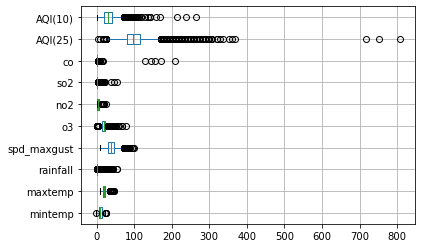

In [110]:
#Boxplot for all the features
md[['mintemp','maxtemp','rainfall','spd_maxgust','o3','no2','so2','co','AQI(25)','AQI(10)']].plot.box(vert = False, grid = True)


Outlier removal for each feature

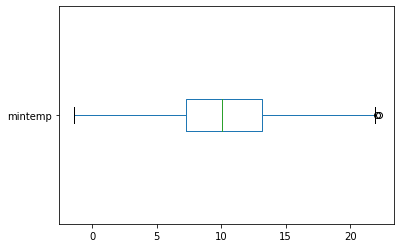

In [111]:

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

l,u = outlier_treatment(md['mintemp'])
md.drop(md[ (md['mintemp'] > u) | (md['mintemp'] < l) ].index , inplace=True)
md[['mintemp']].plot.box(vert=False)


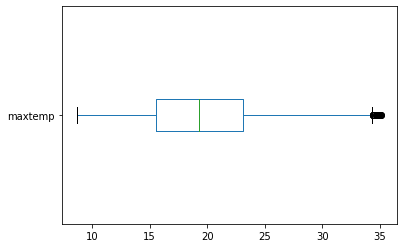

In [112]:
l,u = outlier_treatment(md['maxtemp'])
md.drop(md[ (md['maxtemp'] > u) | (md['maxtemp'] < l) ].index , inplace=True)
md[['maxtemp']].plot.box(vert=False)



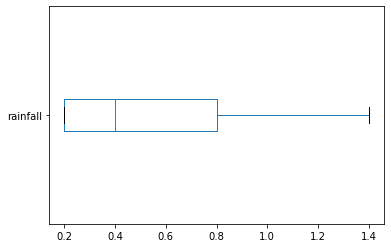

In [113]:

l,u = outlier_treatment(md['rainfall'])
md=md[md['rainfall']>0]
md.drop(md[ (md['rainfall'] > u) | (md['rainfall'] < l) ].index , inplace=True)
md[['rainfall']].plot.box(vert=False)


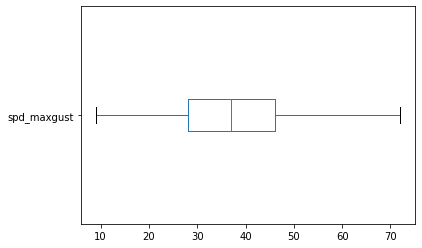

In [114]:
l,u = outlier_treatment(md['spd_maxgust'])
md.drop(md[ (md['spd_maxgust'] > u) | (md['spd_maxgust'] < l) ].index , inplace=True)
md[['spd_maxgust']].plot.box(vert=False)


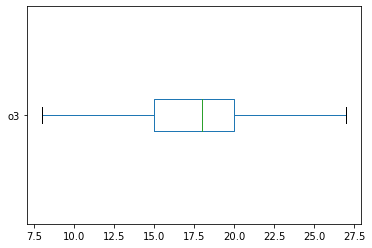

In [115]:
l,u = outlier_treatment(md['o3'])
md.drop(md[ (md['o3'] > u) | (md['o3'] < l) ].index , inplace=True)
md[['o3']].plot.box(vert=False)


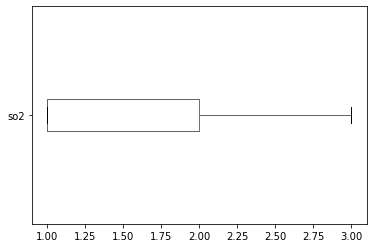

In [116]:
l,u = outlier_treatment(md['so2'])
md.drop(md[ (md['so2'] > u) | (md['so2'] < l) ].index , inplace=True)
md[['so2']].plot.box(vert=False)


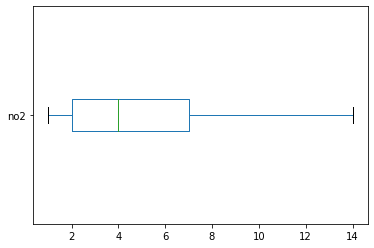

In [117]:
l,u = outlier_treatment(md['no2'])
md.drop(md[ (md['no2'] > u) | (md['no2'] < l) ].index , inplace=True)
md[['no2']].plot.box(vert=False)


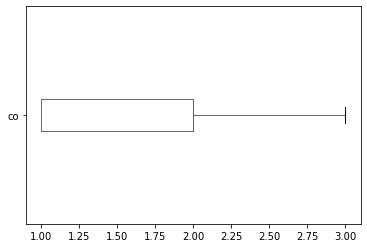

In [93]:
l,u = outlier_treatment(md['co'])
md.drop(md[ (md['co'] > u) | (md['co'] < l) ].index , inplace=True)
md[['co']].plot.box(vert=False)


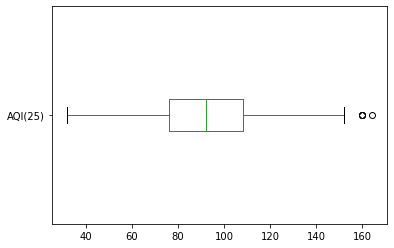

In [118]:
l,u = outlier_treatment(md['AQI(25)'])
md.drop(md[ (md['AQI(25)'] > u) | (md['AQI(25)'] < l) ].index , inplace=True)
md[['AQI(25)']].plot.box(vert=False)


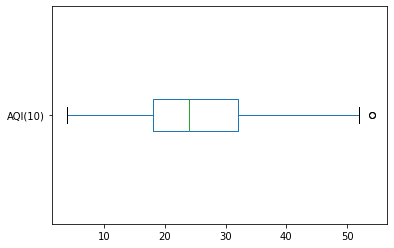

In [119]:
l,u = outlier_treatment(md['AQI(10)'])
md.drop(md[ (md['AQI(10)'] > u) | (md['AQI(10)'] < l) ].index , inplace=True)
md[['AQI(10)']].plot.box(vert=False)


In [120]:
#exporting the outlier free csv
md.to_csv('Outlier_free_data_BOM.csv')

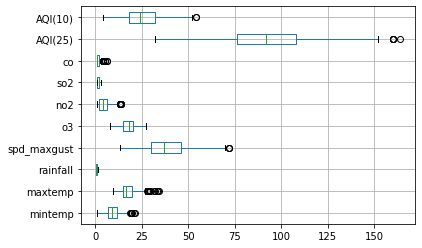

In [121]:
#Boxplot for features after removal of outliers
md[['mintemp','maxtemp','rainfall','spd_maxgust','o3','no2','so2','co','AQI(25)','AQI(10)']].plot.box(vert = False, grid = True)


In [97]:
md=md.drop(['dir_maxgust','no2','co','so2'],axis=1)

In [130]:
#Import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
import datetime as dt
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor as gbr
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score, KFold

In [99]:
#Training and testing dataset
trdt=md[md['date'].dt.year <= 2020]
tsdt=md[md['date'].dt.year > 2020]


<ipython-input-100-eb87b85a10cc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


Feature: 0, Score: 0.30254
Feature: 1, Score: 0.25889
Feature: 2, Score: 0.10518
Feature: 3, Score: 0.18165
Feature: 4, Score: 0.15174


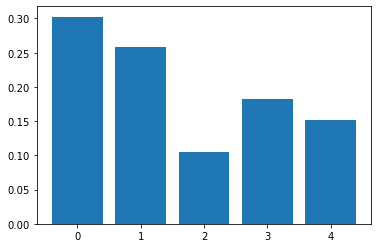

Index(['date', 'mintemp', 'maxtemp', 'rainfall', 'spd_maxgust', 'o3',
       'AQI(25)', 'AQI(10)'],
      dtype='object')


In [100]:
#Finding the important features according to random forest regressor
ytrain=trdt[['AQI(25)']]
xtrain=trdt.drop(['AQI(25)','AQI(10)','date'],axis=1)
ytest=tsdt[['AQI(25)']]
xtest=tsdt.drop(['AQI(25)','AQI(10)','date'],axis=1)

model = RandomForestRegressor()
model.fit(xtrain, ytrain)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print(md.columns)

In [136]:
#Model Fitting (Random Forest Regressor)
ytrain=trdt[['AQI(10)']]
xtrain=trdt.drop(['AQI(25)','AQI(10)','date','rainfall','maxtemp'],axis=1)
ytest=tsdt[['AQI(10)']]
xtest=tsdt.drop(['AQI(25)','AQI(10)','date','rainfall','maxtemp'],axis=1)

model = RandomForestRegressor(random_state=22)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

#R2 score and mse for the model
print('R2 Score: %.3f' %r2_score(ytest,ypred))
print('MSE: %.3f' %mse(ytest,ypred))


R2 Score: -1.380
MSE: 200.981


<ipython-input-136-ffcc9745e40e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


In [137]:
#RMSE for the model
rms = mean_squared_error(ytest, ypred, squared=False)
print('RMSE:%.3f' %rms)

RMSE:14.177


In [103]:
#Parameters for the model without optimisation
pprint(model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}


In [104]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [70,80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a model
model = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain, ytrain)

# Extracting the optimised parameters
print(grid_search.best_params_)



Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  9.9min finished
C:\Users\shibe\anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 70, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 200}


In [138]:
#Best model after hyperparamter optimisation 
best_model=grid_search.best_estimator_
model = RandomForestRegressor(random_state=22,bootstrap=True,max_depth=70,max_features=2,min_samples_leaf=5,min_samples_split=14,n_estimators=200)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
#R2-score
print('R2 score: %.3f' %r2_score(ytest,ypred))
rms = mean_squared_error(ytest, ypred, squared=False)

#MSE and RMSE
print('MSE: %.3f' %mse(ytest,ypred))
print('RMSE: %.3f' %rms)

<ipython-input-138-0d6e1335ffd9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


R2 score: -1.000
MSE: 168.912
RMSE: 12.997


Gradient Boosting Regressor

In [139]:
#Gradient Boosting Regressor
model=gbr(random_state=22)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
#R2-score
print('R2 score: %.3f' %r2_score(ytest,ypred))
rms = mean_squared_error(ytest, ypred, squared=False)

#MSE and RMSE
print('MSE: %.3f' %mse(ytest,ypred))
print('RMSE: %.3f' %rms)

R2 score: -1.496
MSE: 210.745
RMSE: 14.517


C:\Users\shibe\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'max_depth': [70,80, 90, 100, 110],
    'criterion': ['friedman_mse','mse','mae'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300]
}

# Create a model
model = gbr()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain, ytrain)

# Extracting the optimised parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.4min


In [142]:
best_model=grid_search.best_estimator_
model = gbr(random_state=22,criterion='mae',loss='lad',max_depth=70,min_samples_leaf=5,min_samples_split=14,n_estimators=100)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
#R2-score
print('R2 score: %.3f' %r2_score(ytest,ypred))
rms = mean_squared_error(ytest, ypred, squared=False)

#MSE and RMSE
print('MSE: %.3f' %mse(ytest,ypred))
print('RMSE: %.3f' %rms)

C:\Users\shibe\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


R2 score: -1.914
MSE: 246.028
RMSE: 15.685


XGBoost

In [143]:
model = XGBRFRegressor(n_estimators=100,random_state=22)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
#R2-score
print('R2 score: %.3f' %r2_score(ytest,ypred))
rms = mean_squared_error(ytest, ypred, squared=False)

#MSE and RMSE
print('MSE: %.3f' %mse(ytest,ypred))
print('RMSE: %.3f' %rms)

R2 score: -1.179
MSE: 183.982
RMSE: 13.564


C:\Users\shibe\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
